PBL - KELOMPOK 1

1. Muhammad Ainur Riziq (19)
2. Hanifah Amany (16)
3. Putra Nindya Yuwana (22)
4. Mumahhmad Dayutirta Mahara (20)
5. Alifia Bilqi Firajulkha (2)

### Kuis 1: Siklus Hidup Machine Learning
# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [ ]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import cv2

# Load Data

In [ ]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


Kode ini memuat dataset LFW (Labeled Faces in the Wild) menggunakan `fetch_lfw_people`, namun hanya menyertakan orang yang memiliki setidaknya 10 gambar (`min_faces_per_person=10`) dan menjaga gambar tetap berwarna (`color=True`).

Setelah memuat dataset ke dalam variabel `faces`, ia mencetak tiga hal:
1.   Jumlah total label unik (wajah atau orang) dalam dataset
2.   Dimensi data gambar asli (jumlah gambar, tinggi, lebar, dan saluran warna )
3.  Dimensi gambar yang diratakan dengan setiap gambar direpresentasikan sebagai vektor 1D.

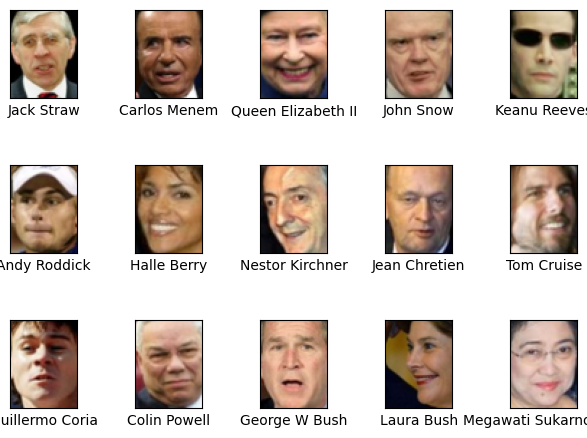

In [ ]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

Kode ini digunakan untuk menampilkan 15 gambar yang dipilih secara acak dari dataset `faces` menggunakan Matplotlib.

Pertama, ini menghasilkan 15 indeks acak (`rand_labels`) dari dataset menggunakan `np.random.randint`, yang digunakan untuk memilih gambar. Kemudian, membuat petak subplot berukuran 3x5 menggunakan `plt.subplots(3, 5)`.

Dalam perulangan, setiap subplot (`axi`) menampilkan gambar yang dipilih secara acak dari `faces.image`, dengan peta warna disetel ke skala abu-abu menggunakan `cmap='bone'`.

Label pada sumbu x dan y dihilangkan (`xticks=[], yticks=[]`) untuk tampilan yang lebih bersih, dan `xlabel` disetel ke nama target (label atau kategori) dari wajah yang sedang ditampilkan.
Terakhir, `fig.tight_layout()` menyesuaikan jarak antar subplot untuk menghindari tumpang tindih.

# Preprocessing

In [ ]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''

'\n    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,\n\n    1. Standardisasi nilai fitur ataupun label\n    2. Penyesuaian ukuran gambar\n    3. Perubahan colorspace gambar\n    4. dsb\n'

In [ ]:
# 1. Penyesuaian Ukuran Gambar
def resize_images(images, size=(64, 64)):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, size)
        resized_images.append(resized_image)
    return np.array(resized_images)

# Resize all images to 64x64
faces_resized = resize_images(faces.images)

# 2. Standardisasi Fitur
X_resized = faces_resized.reshape(len(faces_resized), -1)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_resized)

# Check the new dimensions
print(f'Resized Images Dimension: {faces_resized.shape}')
print(f'Standardized Features Dimension: {X_standardized.shape}')

Resized Images Dimension: (4324, 64, 64, 3)
Standardized Features Dimension: (4324, 12288)


Kode ini melakukan dua operasi utama pada dataset `faces`: mengubah ukuran gambar dan menstandardisasi fitur.

1. Mengubah Ukuran Gambar:

   Fungsi `resize_images` mengubah ukuran semua gambar dalam dataset menjadi 64x64 piksel menggunakan `cv2.resize` OpenCV. Setiap gambar diubah ukurannya dan disimpan dalam daftar, yang kemudian diubah menjadi array NumPy (`faces_resized`).

2. Standarisasi Fitur:

   Setelah diubah ukurannya, gambar diratakan menjadi vektor 1D (`X_resized`). Setiap gambar sekarang memiliki panjang 4096 (64x64). `StandardScaler` kemudian digunakan untuk membakukan vektor-vektor ini dengan menskalakannya agar memiliki rata-rata 0 dan deviasi standar 1. Fitur-fitur yang distandarisasi disimpan dalam `X_standardized`.

Terakhir, kode tersebut mencetak dimensi gambar yang diubah ukurannya dan vektor fitur standar.

# Features Extraction

In [ ]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''

In [ ]:
# Function Extract Histogram Features For Each Channel
def generate_hist(data, bins_num=100):
    hist_data = []
    for i in data:
        h_red = np.histogram(i[..., 0].ravel(), bins=bins_num)[0]
        h_green = np.histogram(i[..., 1].ravel(), bins=bins_num)[0]
        h_blue = np.histogram(i[..., 2].ravel(), bins=bins_num)[0]
        h_concat = np.concatenate((h_red, h_green, h_blue), axis=0)
        hist_data.append(h_concat)
    return np.array(hist_data)

# Extract histogram features
hist_features = generate_hist(faces_resized, bins_num=100)

Kode ini mendefinisikan fungsi `generate_hist` yang mengekstrak fitur histogram dari saluran warna merah, hijau, dan biru pada setiap gambar dalam dataset. Untuk setiap gambar di `data`, histogram saluran merah, hijau, dan biru dihitung satu per satu menggunakan `np.histogram`, dengan jumlah bin yang ditentukan (`bins_num`, defaultnya adalah 100). Histogram ini digabungkan menjadi satu vektor fitur untuk setiap gambar. Fitur histogram yang dihasilkan untuk semua gambar dikumpulkan dalam `hist_data` dan dikembalikan sebagai array NumPy.

Setelah mendefinisikan fungsinya, kode mengekstrak fitur histogram dari gambar yang diubah ukurannya (`faces_resized`) dengan memanggil `generate_hist` dengan 100 bins. Outputnya, disimpan di `hist_features`, mewakili distribusi warna di saluran merah, hijau, dan biru untuk setiap gambar.

# Build Model

In [ ]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''


In [ ]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(hist_features, faces.target, test_size=0.2, random_state=42, stratify=faces.target)

# Create and Train the SVM Model with RBF Kernel
model = SVC(kernel='rbf', C=10, gamma='scale')
model.fit(X_train, y_train)

SVC(C=10)

Kode ini melakukan dua tugas: pemisahan data dan pelatihan model menggunakan Support Vector Machine (SVM).

1. Pemisahan Data:
   - Dataset dibagi menjadi set pelatihan dan pengujian menggunakan `train_test_split`. Fitur `hist_features` dan label `faces.target` dibagi sehingga 80% data digunakan untuk pelatihan dan 20% untuk pengujian (`test_size=0.2`). `stratify=faces.target` memastikan bahwa distribusi kelas dipertahankan antara set pelatihan dan pengujian, dan `random_state=42` memastikan reproduksibilitas pemisahan.

2. Pelatihan Model SVM:
   - Model SVM dengan kernel RBF (Radial Basis Function) dibuat menggunakan `SVC(kernel='rbf', C=10, gamma='scale')`. Parameter regularisasi `C=10` mengontrol trade-off antara ukuran margin dan kesalahan klasifikasi. `gamma='scale'` secara otomatis mengatur koefisien kernel berdasarkan data. Model kemudian dilatih pada data pelatihan (`X_train` dan `y_train`) menggunakan `model.fit`.

Kode ini mempersiapkan model untuk pengujian dan evaluasi pada data yang tidak terlihat.

# Evaluation

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''


'\n    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing\n    dengan menggunakan metric akurasi dan juga classfication report\n\n    Hints:\n        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5\n'

In [ ]:
# Evaluation
# Eval on Training
y_train_predict = model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_predict)

# Eval on Test
y_test_predict = model.predict(X_test)
acc_test = accuracy_score(y_test, y_test_predict)

# Print Accuracy
print(f'Accuracy on Train: {acc_train:.2%}')
print(f'Accuracy on Test: {acc_test:.2%}')

# Classification Report
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_predict, target_names=faces.target_names))

Accuracy on Train: 92.34%
Accuracy on Test: 11.45%
Classification Report for Test Data:
                           precision    recall  f1-score   support

             Abdullah Gul       0.00      0.00      0.00         4
             Adrien Brody       0.00      0.00      0.00         2
         Alejandro Toledo       0.00      0.00      0.00         8
             Alvaro Uribe       0.00      0.00      0.00         7
          Amelie Mauresmo       0.00      0.00      0.00         4
             Andre Agassi       0.00      0.00      0.00         7
             Andy Roddick       0.00      0.00      0.00         3
           Angelina Jolie       0.00      0.00      0.00         4
              Ann Veneman       0.00      0.00      0.00         2
          Anna Kournikova       0.00      0.00      0.00         2
            Ari Fleischer       0.00      0.00      0.00         3
             Ariel Sharon       0.14      0.19      0.16        16
    Arnold Schwarzenegger       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kode ini mengevaluasi performa model SVM yang dilatih pada dataset pelatihan dan pengujian menggunakan laporan akurasi dan klasifikasi.

1. Evaluasi Data Pelatihan:
   Model memprediksi label untuk set pelatihan (`X_train`) dan prediksi disimpan di `y_train_predict`. Akurasi set pelatihan dihitung menggunakan `accuracy_score(y_train, y_train_predict)`, yang membandingkan label prediksi dengan label sebenarnya.

2. Evaluasi Data Uji:
   Demikian pula, model memprediksi label untuk set pengujian (`X_test`), dan prediksi ini disimpan di `y_test_predict`. Akurasi pada set pengujian dihitung dengan `accuracy_score(y_test, y_test_predict)`.

3. Akurasi Cetak:
   Akurasi pelatihan dan pengujian dicetak, menunjukkan seberapa baik performa model di kedua set.

4. Laporan Klasifikasi:
   Fungsi `classification_report` memberikan metrik terperinci seperti presisi, perolehan, dan skor F1 untuk setiap kelas di set pengujian. Laporan dicetak dengan nama kelas (`faces.target_names`) untuk memudahkan interpretasi hasil.

Kode ini membantu menilai generalisasi model dengan membandingkan performanya pada data pelatihan dan pengujian.

## Challenge

- Menggunakan fitur lain selain histogram (ekstra 20 poin):
  - Menggunakan Histogram of Oriented Gradients


In [ ]:
from skimage.feature import hog

# Ekstraksi Fitur HOG
def extract_hog_features(images):
    hog_features = []
    for image in images:
        # Menggunakan channel_axis=2 untuk gambar RGB
        features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False, channel_axis=-1)
        hog_features.append(features)
    return np.array(hog_features)

# Ekstraksi fitur HOG
hog_features = extract_hog_features(faces_resized)

Kode ini melakukan ekstraksi fitur Histogram of Oriented Gradients (HOG) dari dataset `faces_resized`, yang berisi gambar yang diubah ukurannya.

1. Fungsi Ekstraksi Fitur HOG:
   Fungsi `extract_hog_features` menelusuri setiap gambar di input `images` dan menerapkan ekstraksi fitur HOG menggunakan fungsi `hog` dari `skimage.feature`. HOG menangkap struktur tepi dan gradien dalam sebuah gambar, yang berguna untuk mendeteksi objek.

   `pixels_per_cell=(8, 8)` membagi gambar menjadi sel berukuran 8x8 piksel, dan `cells_per_block=(2, 2)` mendefinisikan blok sebagai grup sel 2x2 untuk normalisasi.

   `channel_axis=-1` menentukan bahwa gambarnya adalah RGB, sehingga HOG akan dihitung di semua saluran warna.

   Fitur HOG yang diekstraksi ditambahkan ke daftar (`hog_features`) dan diubah menjadi array NumPy sebelum dikembalikan.

2. Ekstraksi Fitur:
   Setelah mendefinisikan fungsinya, ia dipanggil untuk mengekstrak fitur HOG dari `faces_resized`. Vektor fitur HOG yang dihasilkan disimpan di `hog_features`, yang kemudian dapat digunakan untuk tugas-tugas seperti melatih model pembelajaran mesin.

Proses ini mengubah informasi visual di setiap gambar menjadi vektor fitur HOG, yang menangkap informasi struktural utama.

- Menggunakan model lain selain SVM (ekstra 10 poin) :
  - Menggunakan K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(hog_features, faces.target, test_size=0.2, random_state=42, stratify=faces.target)

# Create and Train the KNN Model
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

Kode ini melatih pengklasifikasi k-Nearest Neighbors (KNN) pada fitur HOG yang diekstraksi dari dataset `faces_resized`.

1. Pemisahan Data:
   Dataset dibagi menjadi set pelatihan dan pengujian menggunakan `train_test_split`, dengan 80% data digunakan untuk pelatihan dan 20% untuk pengujian (`test_size=0.2`). Pemisahan ini bertingkat untuk mempertahankan distribusi label di kedua set. Fitur masukannya adalah `hog_features`, dan labelnya adalah `faces.target`.

2. Pembuatan dan Pelatihan Model KNN:
   Pengklasifikasi KNN dibuat dengan `n_neighbours=5`, artinya model akan mempertimbangkan 5 tetangga terdekat untuk mengklasifikasikan titik data baru.
   Model kemudian dilatih pada data pelatihan (`X_train` dan `y_train`) menggunakan `model_knn.fit`.

Proses ini menyiapkan model KNN yang dapat digunakan untuk memprediksi kelas data yang tidak terlihat berdasarkan kesamaan (kedekatan) dengan titik data lain di set pelatihan.

In [ ]:
# Evaluation
# Eval on Training
y_train_predict = model_knn.predict(X_train)
acc_train = accuracy_score(y_train, y_train_predict)

# Eval on Test
y_test_predict = model_knn.predict(X_test)
acc_test = accuracy_score(y_test, y_test_predict)

# Print Accuracy
print(f'Accuracy on Train: {acc_train:.2%}')
print(f'Accuracy on Test: {acc_test:.2%}')

# Classification Report
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_predict, target_names=faces.target_names))

Accuracy on Train: 64.04%
Accuracy on Test: 44.16%
Classification Report for Test Data:
                           precision    recall  f1-score   support

             Abdullah Gul       0.25      0.75      0.38         4
             Adrien Brody       0.50      1.00      0.67         2
         Alejandro Toledo       0.11      0.50      0.18         8
             Alvaro Uribe       0.29      0.29      0.29         7
          Amelie Mauresmo       0.67      0.50      0.57         4
             Andre Agassi       0.31      0.57      0.40         7
             Andy Roddick       0.67      0.67      0.67         3
           Angelina Jolie       0.00      0.00      0.00         4
              Ann Veneman       0.00      0.00      0.00         2
          Anna Kournikova       0.00      0.00      0.00         2
            Ari Fleischer       0.14      0.33      0.20         3
             Ariel Sharon       0.50      0.88      0.64        16
    Arnold Schwarzenegger       0.22    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Kode ini mengevaluasi performa model KNN yang dilatih menggunakan metrik akurasi dan klasifikasi pada dataset pelatihan dan pengujian.

1. Evaluasi Data Pelatihan:
   Model membuat prediksi pada set pelatihan (`X_train`), dan akurasi dihitung dengan membandingkan label prediksi (`y_train_predict`) dengan label sebenarnya (`y_train`) menggunakan `accuracy_score`.

2. Evaluasi Data Uji:
   Demikian pula, model memprediksi label untuk set pengujian (`X_test`), dan akurasi dihitung dengan membandingkan label prediksi (`y_test_predict`) dengan label pengujian sebenarnya (`y_test`).

3. Akurasi Cetak:
   Akurasi pelatihan dan pengujian dicetak untuk menunjukkan seberapa baik performa model pada kedua set data, sehingga memberikan wawasan apakah model tersebut overfit.

4. Laporan Klasifikasi:
   Laporan klasifikasi untuk data pengujian menggunakan `classification_report`, yang memberikan presisi, perolehan, dan skor F1 untuk setiap kelas dalam dataset. `target_names` adalah nama orang-orang dalam dataset, sehingga laporan lebih mudah diinterpretasikan.

Proses ini digunakan untuk mengevaluasi efektivitas model dalam membedakan kelas-kelas yang berbeda dan mendeteksi potensi overfitting atau underfitting.

- Evalusi dengan metric lain ataupun report dengan *confusion matrix*

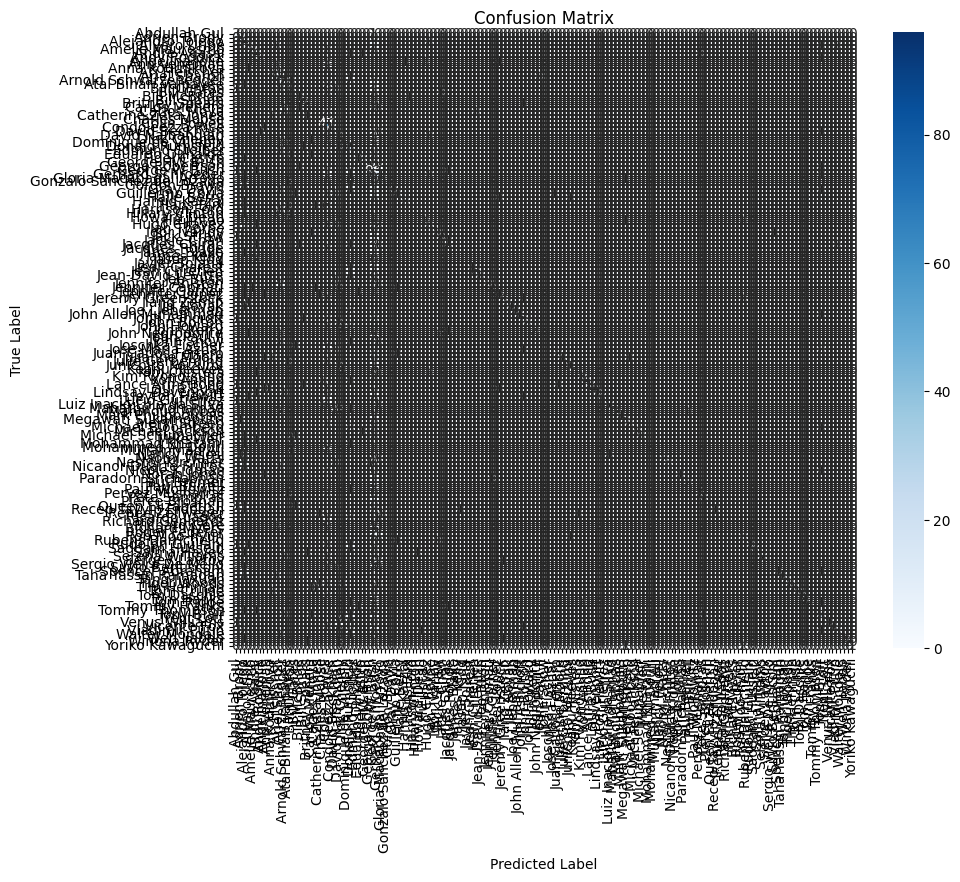

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_predict)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Kode ini menghitung dan memvisualisasikan matriks konfusi untuk mengevaluasi kinerja model KNN.

1. Perhitungan Matriks Kebingungan:
   Matriks konfusi dihitung menggunakan `confusion_matrix(y_test, y_test_predict)`, dengan `y_test` adalah label sebenarnya, dan `y_test_predict` adalah label prediksi. Matriks konfusi menunjukkan berapa kali suatu kelas diprediksi dengan benar atau salah oleh model.

2. Merencanakan Matriks Kebingungan:
   Matriks divisualisasikan menggunakan fungsi `peta panas` `seaborn`. Ini menampilkan jumlah prediksi yang benar dan salah untuk setiap kelas, dengan anotasi (`annot=True`) dan skema warna (`cmap='Blues'`).
   
   Sumbu x (`xticklabels`) mewakili label yang diprediksi, dan sumbu y (`yticklabels`) mewakili label sebenarnya, keduanya diberi label dengan nama kelas target (`faces.target_names`).
   
   Plot menyertakan label sumbu, judul, dan berukuran 10x8 untuk visibilitas yang lebih baik.

Visualisasi pada proses ini membantu mengidentifikasi pola kesalahan klasifikasi, menyoroti kelas mana yang sering tertukar dengan kelas lainnya.